# Time-outs

This article builds on the previous one. The following code will create a .txt file with one of the Ordinary product's ingredient list. Just like a fine-made anything, we shall refine the method!

Full code from previous article:

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

#dict
headers = {
    'user-agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36',
    'referer' : 'https://www.sephora.com/brand/'
}
urls = [
        'https://www.sephora.com/brand/the-ordinary',
        ]

#for n in range(len(urls)):
n = 0
page = requests.get(urls[n], headers = headers)
soup = BeautifulSoup(page.content, 'html.parser')
#finds all of the urls
subsections = soup.find_all('a')

#makes a list of all urls
links = []
for link in subsections:
    links.append(link.get('href'))

#regex finds the ordinary links
products = []
reg = re.compile("theordinary_fromthebrand")
for n in range(len(links)):
    products.append(reg.search(links[n]))
    
#filters out NoneType objects, only product links left
f_products = [x for x in products if x is not None]

f_products_links = ["https://www.sephora.com" + f_products[x].string for x in range(len(f_products))]

#loads only the HA moisturising factors
prod_page = requests.get(f_products_links[6])

soup = BeautifulSoup(prod_page.content, 'html.parser')
ingreds = soup.find_all('div', {'class': 'css-pz80c5'})
title = soup.find('span', {'class': 'css-0'}).text

#ingredients tab
ing_tab = str(ingreds[2]).split('<br/><br/>')
#haha lol i haven't thought of how to change this line yet, but it works
label = ing_tab[1].replace('.', '').replace('</div>', '').replace('\r', '').replace('\n', '').split(', ')

filepath = '/path/to/file/folder'

#write all product ingredients in a .txt file
#if you decide to spend your night becoming a rogue biochemist:
#make all of the file names
#a_bunch_of_files = ["path/to/file%i.txt" %x for x in range(len(f_products_links))]
#loop the rest, or just make a database
links_path = filepath + '/ingred_list.txt'
with open(links_path, 'w+') as linksfile:
    linksfile.write(title + '\n') #the first line is the product name
    for it in label:
        linksfile.write('%s\n' % it)
    
linksfile.close()
linksfile.closed

We are incredibly smart and capable people, so we know that in order to not get banned, we need to do a few things:
1. Time-out the requests
2. Change the user-agents
3. Change the IPs

I am not condoning basically launching a sorta kinda DDoS attack, so use your brain and be nice to sysadmins. You might not have to do the 3rd point, you kind of need to do the 2nd, but you definitely need to do the 1st.

So, basically we need to set some sort of a time-out to space out the requests sent to a web page.

There are a few ways of timing-out the requests:
1. Just time.sleep()
2. Responsive delay
3. Randomized responsive delay

## Just time.sleep()
To accomplish this, we'll need to import the Time module, and, honestly, the function is pretty self-explanatory:

In [ ]:
import time

for n in urls:
    page = requests.get(urls, headers = headers)
    # the scrapening happens
    time.sleep(5) #this is the time-out: 5 seconds

## Responsive delay
Depending on the time of day and web traffic, responsive delays might come in handy.

The delay will be proportional to how long it took to load the page:

In [ ]:
for n in urls:
    start = time.time()
    page = requests.get(urls[n], headers = headers)
    delay = time.time() - start
    # the scrapening
    time.sleep(delay) #sleeps for however long it took to load the page

time.time() returns a float - time in seconds since the epoch (platform dependent. For Unix it's January 1, 1970, 00:00:00 (UTC).
> <font color='pink'>According to Wikipedia, the Unix time is sometimes referred to as *the Epoch* and I think that's beautiful. </font> 

Can I elaborate on this matter? No. And it's not necessary at this point, we can talk about it later.

## Randomized responsive delay
Now we get to the f-u-u-n stuff. The point of randomized responsive delays is to make 'em guess - your requests will be completely random **and** responsive to the site's abilities to handle traffic.
People are random, so we need the script to be random. 
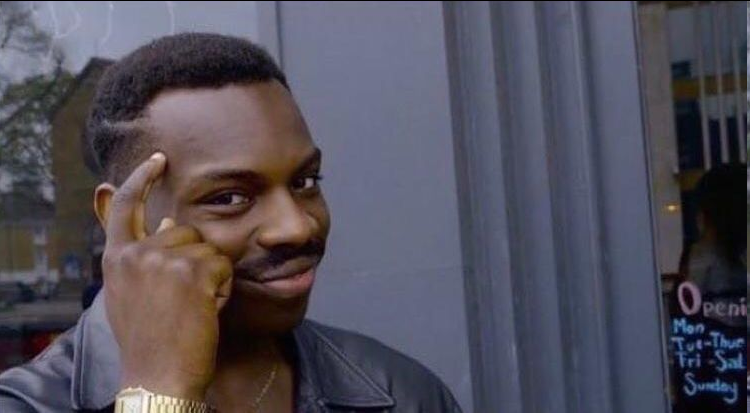

Here's how with the python Random module:

In [ ]:
import random

for n in urls:
    start = time.time()
    page = requests.get(urls[n], headers = headers)
    delay = time.time() - start
    # the scrapening
    time.sleep(random.uniform(1, 2) * delay)

Now the script will time out sometime between 1 and 2 times longer than it took to load the site.

This is the (for now) finished code:

In [ ]:
import requests
import time
import random
from bs4 import BeautifulSoup
import re

#dict
headers = {
    'user-agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36',
    'referer' : 'https://www.sephora.com/brand/'
}
urls = [
        'https://www.sephora.com/brand/the-ordinary',
        ]

#for n in range(len(urls)):
n = 0
start = time.time()
page = requests.get(urls[n], headers = headers)
delay = time.time() - start

soup = BeautifulSoup(page.content, 'html.parser')
#finds all of the urls
subsections = soup.find_all('a')

#makes a list of all urls
links = []
for link in subsections:
    links.append(link.get('href'))

#regex finds the ordinary links
products = []
reg = re.compile("theordinary_fromthebrand")
for n in range(len(links)):
    products.append(reg.search(links[n]))
    
#filters out NoneType objects, only product links left
f_products = [x for x in products if x is not None]

f_products_links = ["https://www.sephora.com" + f_products[x].string for x in range(len(f_products))]

#loads only the HA moisturising factors
prod_page = requests.get(f_products_links[6])

soup = BeautifulSoup(prod_page.content, 'html.parser')
ingreds = soup.find_all('div', {'class': 'css-pz80c5'})
title = soup.find('span', {'class': 'css-0'}).text

#ingredients tab
ing_tab = str(ingreds[2]).split('<br/><br/>')
#haha lol i haven't thought of how to change this line yet, but it works
label = ing_tab[1].replace('.', '').replace('</div>', '').replace('\r', '').replace('\n', '').split(', ')

filepath = '/path/to/file/folder'

#write all product ingredients in a .txt file
#if you decide to spend your night becoming a rogue biochemist:
#make all of the file names
#a_bunch_of_files = ["path/to/file%i.txt" %x for x in range(len(f_products_links))]
#loop the rest, or just make a database
links_path = print(filepath + '/ingred_list%i.txt' %n)
with open(links_path, 'w+') as linksfile:
    linksfile.write(title + '\n') #the first line is the product name
    for it in label:
        linksfile.write('%s\n' % it)
    
linksfile.close()
linksfile.closed

time.sleep(random.uniform(1, 2) * delay)